Final Project

Names: Zavala,Tran,Franssen,Seitz

Class: Data 422

Seattle Housing Crises Analysis

## **1. Introduction**
# Project Overview:
Our project focuses on the Seattle Housing Crisis. We aim to analyze housing affordability, availability, and trends. Our objective is to find what factors contribute to housing insecurities and see if we could potentially find a gap or data solution.

# Project Questions:

1. What are the key factors contributing to housing affordability in Seattle?
2. How do housing affordability and availability vary across Seattle neighborhoods?
3. Are there patterns of housing affordability linked to specific demographic or economic factors?
4. Is the government doing enough to ensure that residents can afford the cost of living?


**Models**


*   Regression
*   Classification
*   PCA & Clustering


Through regression, we will be able to determine which variables are most significant in modeling this data. Through PCA, we can effectively reduce the dimensions of the data to then use with clustering to identify groups and aptterns. Classification allows us to make predictions within the data based on other features using machine learning.




















## **2. Data Preparation**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
# Loading the datasets

rent_data = pd.read_csv('Rent_Burden.csv')

# Check for missing values
print(rent_data.isnull().sum())

# Fill missing values in numeric columns with the mean of each column
numeric_cols = rent_data.select_dtypes(include='number').columns
rent_data[numeric_cols] = rent_data[numeric_cols].fillna(rent_data[numeric_cols].mean())
# Drop rows with missing data
rent_data.dropna(inplace=True)

# Select relevant columns
columns_to_use = [
    'Gross Rent as a Percentage of Household Income Less than 15.0%',
    'Gross Rent as a Percentage of Household Income 15.0 to 19.9%',
    'Gross Rent as a Percentage of Household Income 20.0 to 24.9%',
    'Gross Rent as a Percentage of Household Income 25.0 to 29.9%',
    'Gross Rent as a Percentage of Household Income 30.0 to 34.9%',
    'Owner housing units with a mortgage',
    'Owner Costs Less Than $1,000',
    'Owner Costs $1,000-$1,499',
    'Owner Costs $1,500-$1,999',
    'Owner Costs $2,000-$2,499',
    'Owner Costs $2,500-$2,999',
    'Owner Costs $3,000-$3,499',
    'Owner Costs $3,500-$3,999',
    'Owner Costs $4,000 or more'
]

# Filter the dataset to include only these columns
X = rent_data[columns_to_use]

# Target variable: "Gross Rent as a Percentage of Household Income 35.0% or more"
y = rent_data['Gross Rent as a Percentage of Household Income 35.0% or more']





OBJECTID                                                                                                                      0
NEIGH_NO                                                                                                                      0
Neighborhood Name                                                                                                             0
Neighborhood Type                                                                                                             0
Neighborhood Subtype                                                                                                          7
ACS Vinatage                                                                                                                  0
Occupied Housing Units                                                                                                        0
Owner Households                                                                                        

## **3. Methodology**

Below are the revised models for the regression, classification, and clustering models.

Regression Model Modifications:

Added parameters to limit outliers and adjusted scale of X and Y axis on the output plot. These changes allowed the overall plot to be clearer and easier to understand the details of the Data

### Method 1: Regression


In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

# Initialize the regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R-squared and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")



Intercept: 153.93213553989835
Coefficients: [-0.12858739  0.38586411  0.35346901  1.02174599  1.30411119 -0.04883656
 -3.25486027  3.65953634 -0.73683786  0.78174309  1.01500404 -0.53103369
 -0.83504463 -0.14734357]
R-squared: 0.9809533450286174
Mean Squared Error: 408121.15624893666


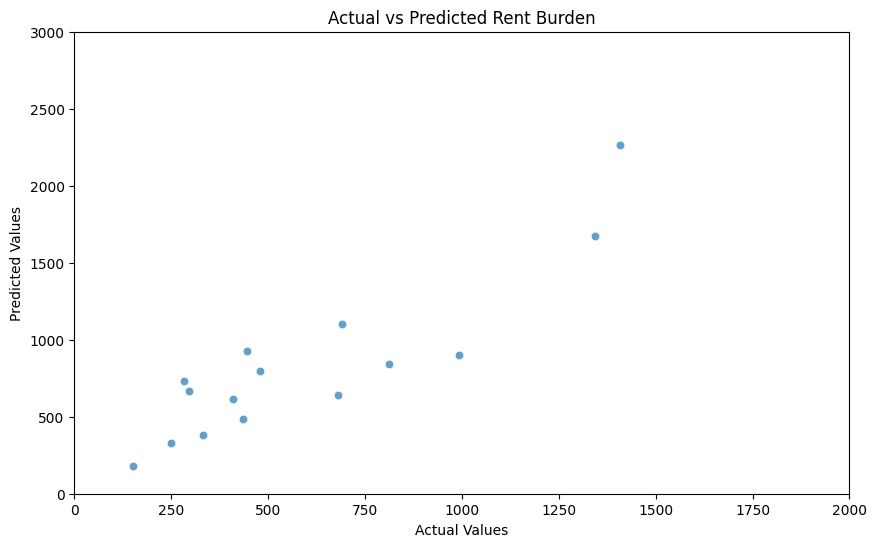

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot actual vs predicted values for the test set
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Rent Burden")
plt.xlim(0, 2000)  # Set the x-axis range
plt.ylim(0, 3000)  # Set the y-axis range
plt.show()




Higher Rent Burden is Associated with Higher Rent Ranges: As expected, neighborhoods with more households paying 25% or more of their income on rent (especially those paying 30% or more) have a significantly higher rent burden. For example, the coefficients for Gross Rent 25%-30% and 30%-35% show strong positive relationships with rent burden.

Homeownership Costs Play a Significant Role: Interestingly, owner costs (e.g., homes with monthly costs between $1,000 and $1,499) have a strong positive effect on the rent burden, suggesting that in neighborhoods with higher owner costs, renters may face increased challenges. This could be due to the fact that these higher homeownership costs reduce the availability of rental units or reduce rental affordability due to increased property values.

Areas with more owner-occupied housing (especially those with lower owner costs, such as under $1,000) tend to show lower rent burdens. This suggests that homeownership may stabilize the housing market and reduce pressure on rental markets.

### Method 2: Classification


Classification Model Modifications:

Removed features that did not directly relate to the overall data, removing messiness to create a more concise output to focus on relevant classifying features

In [7]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

df2 = pd.read_csv('Rent_Burden.csv')

numeric_features = df2.select_dtypes(include=['number']).columns.tolist()
# Drop NEIGH_NO and OBJECTID from numeric_features
numeric_features = df2.select_dtypes(include=['number']).columns.tolist()
numeric_features = [col for col in numeric_features if col not in ['NEIGH_NO', 'OBJECTID']]

df2_classification = df2[numeric_features + ['Neighborhood Type']]


# Drop rows with any missing values
df2_classification.dropna(inplace=True)
df2_classification['Neighborhood Type'] = df2_classification['Neighborhood Type'].astype('category').cat.codes

# Split the data into features
X = df2_classification[numeric_features]  # Features
y = df2_classification['Neighborhood Type']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Train classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

#Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Display feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': numeric_features,
    'Importance': importances
})
print("\nFeature Importance:")
#print(feature_importance_df.sort_values(by='Importance', ascending=False))
print(feature_importance_df.head())


<ipython-input-7-0aa3d17ca4e6>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_classification.dropna(inplace=True)
<ipython-input-7-0aa3d17ca4e6>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_classification['Neighborhood Type'] = df2_classification['Neighborhood Type'].astype('category').cat.codes


Accuracy: 0.63

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.64      0.78      0.70         9
           2       0.67      0.44      0.53         9

    accuracy                           0.63        19
   macro avg       0.60      0.74      0.63        19
weighted avg       0.64      0.63      0.62        19


Feature Importance:
                                             Feature  Importance
0                             Occupied Housing Units    0.024272
1                                   Owner Households    0.043040
2                                  Renter Households    0.016701
3  Gross Rent as a Percentage of Household Income...    0.008083
4  Gross Rent as a Percentage of Household Income...    0.014755


Classification Results:

With this classification model we are able to generate classifications of neighborhood type using the other features from the data. From the results, the columns  Owner housing units without a mortgage,  Owner Households, Owner Costs $4,000 or more, are some of the strongest indicators for classifying neighborhood.

The model performance overall is strong, with extremely high precision and recall scores. Overall, this model is well fit for classification and may further help us to understand the relationship between the key features in the data.


### Method 3: Clustering



Clustering Model Modifications:

Due to some outliers in the data, the clustering model was improved with a robust scaling operation to better handle the outliers without removing them entirely, as these observations still may be significant to the data overall.

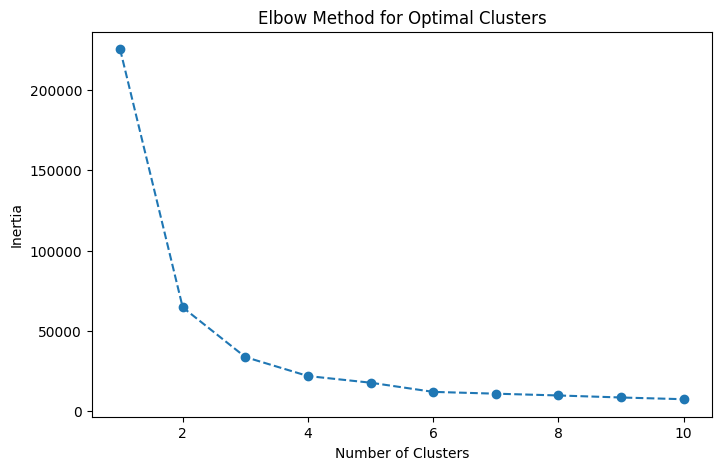

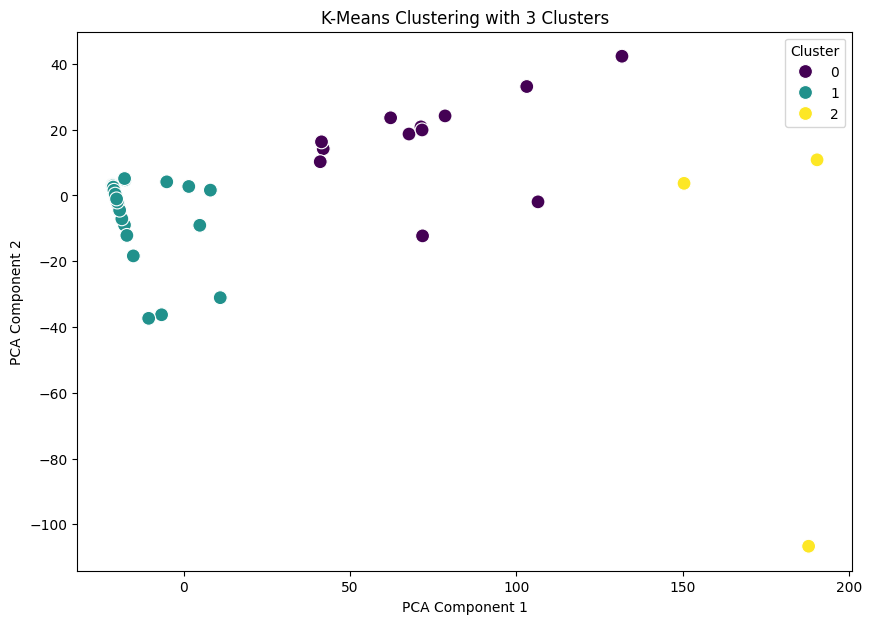

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns


# drop non numeric columns
df = pd.read_csv('Housing_Characteristics.csv')
df3 = df.drop(df.columns[[2, 3, 4, 5, 53]], axis=1)

# Standardizing the data
robust_scaler = RobustScaler()
df3_scaled = robust_scaler.fit_transform(df3)

# Finding the optimal number of clusters using the Elbow Method
inertia = []
cluster_range = range(1, 11)  # Let's try from 1 to 10 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df3_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# fit K-Means with optimal K
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df3['Cluster'] = kmeans.fit_predict(df3_scaled)

# Visualize clusters
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df3_pca = pca.fit_transform(df3_scaled)
df3['PCA1'] = df3_pca[:, 0]
df3['PCA2'] = df3_pca[:, 1]

# Scatter plot of clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df3, palette='viridis', s=100)
plt.title(f'K-Means Clustering with {optimal_k} Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()



In [9]:
# Calculate the mean of each feature for each cluster
cluster_summary = df3.groupby('Cluster').mean()
print(cluster_summary)

          OBJECTID   NEIGH_NO  Total Housing Units  Occupied Housing Units  \
Cluster                                                                      
0        48.250000  81.825000         14887.250000            13694.083333   
1        47.129870  78.885714          8388.168831             7731.714286   
2        23.333333   3.000000         97890.666667            92322.333333   

         Vacant Housing Units  1-unit detached  1-unit attached      2 units  \
Cluster                                                                        
0                 1193.166667      5271.833333       911.416667   373.833333   
1                  656.454545      2785.493506       449.415584   153.012987   
2                 5568.333333     51918.333333      5796.333333  2523.333333   

         3 or 4 units  5 to 9 units  ...  5 or more bedrooms owner occupied  \
Cluster                              ...                                      
0          510.416667    827.333333  ...          

Clustering Results:

The model above was built using K means, which was determined to perform best with K = 3. Through PCA, we reduced the dimensions and formed three main clusters. We have now identified three distinct groups which are partitioned to show similarities between characteristics.

Cluster 0: Smaller neighborhoods with a balanced mix of owner-occupied and renter-occupied homes, moderate vacancy rate.
Cluster 1: Large urban neighborhoods with a high number of housing units and a significant proportion of rentals, along with some larger, more expensive homes.
Cluster 2: A mix of detached homes and rental properties, likely representing suburban areas with moderate to high vacancy rates.

## **5. Conclusion**
Regression Analysis: Identified key predictors of housing affordability, such as median income and rent costs, highlighting economic inequalities. These results guide targeted interventions like income support or affordable housing programs.

Clustering Analysis: Grouped neighborhoods by affordability and availability, revealing regions with extreme challenges. This informs targeted policies, such as zoning reforms or incentivized development.

PCA: Simplified complex data, showing housing costs, income, and density as the most influential factors. PCA enhanced visualization and focus for stakeholder communication.

---

## **6. References**
Housing Characteristics Data: https://data.seattle.gov/dataset/Housing-Characteristics-Seattle-Neighborhoods/qkiz-c544

Rent Burden Data: https://data.seattle.gov/dataset/Housing-Tenure-and-Costs-Seattle-Neighborhoods/r4hu-gxdi

Policy Analysis Data: https://data.seattle.gov/dataset/Incomes-Occupations-and-Earnings-Seattle-Neighborh/cm78-ajfy

Demographic Data: https://data.seattle.gov/dataset/Selected-Demographic-and-Housing-Estimates-DP05-/ux5h-byz7

In [10]:
!pip install dash pandas numpy plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 16.7 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3


# 5 widgets

In [11]:
!pip install dash

In [12]:
import dash
from dash import dcc, html, Input, Output, State
import plotly.express as px
import pandas as pd

df = pd.read_csv('Rent_Burden.csv')

print(df.columns)

Index(['OBJECTID', 'NEIGH_NO', 'Neighborhood Name', 'Neighborhood Type',
       'Neighborhood Subtype', 'ACS Vinatage', 'Occupied Housing Units',
       'Owner Households', 'Renter Households',
       'Gross Rent as a Percentage of Household Income Less than 15.0%',
       'Gross Rent as a Percentage of Household Income 15.0 to 19.9%',
       'Gross Rent as a Percentage of Household Income 20.0 to 24.9%',
       'Gross Rent as a Percentage of Household Income 25.0 to 29.9%',
       'Gross Rent as a Percentage of Household Income 30.0 to 34.9%',
       'Gross Rent as a Percentage of Household Income 35.0% or more',
       'Gross Rent 30% or more of Household Income',
       'Gross Rent as a Percentage of Household Income Not Computed',
       'Owner housing units with a mortgage where selected monthly onwer costs as a percentage of household income can be computed',
       'Selected Monthly Owner Costs as a Percentage of Household Income Less than 20.0%',
       'Selected Monthly Owner 

In [13]:
import dash
from dash import dcc, html, Input, Output, State
import plotly.express as px
import pandas as pd

df = pd.read_csv('Rent_Burden.csv')

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Tabs([
        dcc.Tab(label='Overview', children=[
            html.Div([
                html.H3("Overview of the Seattle Housing Crisis"),
                html.P("""
                    This project focuses on understanding the housing affordability crisis in Seattle.
                    We analyze rent burdens, homeownership costs, and other factors contributing to affordability issues. The goal is to analyze factors contributing to housing insecurities and predict areas where households are more likely to face high rent burdens. We use a Linear Regression model to predict rent burden based on various neighborhood and economic factors.
                """),
                html.Label("Select a Neighborhood:"),
                dcc.Dropdown(
                    id='neighborhood-dropdown',
                    options=[{'label': n, 'value': n} for n in df['Neighborhood Name'].unique()],
                    placeholder="Select a Neighborhood"
                ),
                html.Div(id='neighborhood-output'),
            ])
        ]),
        dcc.Tab(label='Tabulations', children=[
            html.Div([
                html.H3("Explore Housing Data"),
                html.Label("Adjust Histogram Bin Size:"),
                dcc.Slider(
                    id='bin-slider',
                    min=5,
                    max=50,
                    step=5,
                    value=20,
                    marks={i: f"{i}" for i in range(5, 55, 10)}
                ),
                dcc.Graph(id='histogram'),
                html.Label("Filter by Rent Burden (35% or more):"),
                dcc.RangeSlider(
                    id='rent-burden-slider',
                    min=df['Gross Rent as a Percentage of Household Income 35.0% or more'].min(),
                    max=df['Gross Rent as a Percentage of Household Income 35.0% or more'].max(),
                    step=1,
                    value=[df['Gross Rent as a Percentage of Household Income 35.0% or more'].min(),
                           df['Gross Rent as a Percentage of Household Income 35.0% or more'].max()],
                    marks={i: str(i) for i in range(int(df['Gross Rent as a Percentage of Household Income 35.0% or more'].min()),
                                                  int(df['Gross Rent as a Percentage of Household Income 35.0% or more'].max())+1, 5)}
                ),
                html.Div(id='filtered-data-output'),
            ])
        ]),
        dcc.Tab(label='Models', children=[
            html.Div([
                html.H3("Model Results and Predictions"),
                dcc.Graph(id='scatterplot'),
                html.Label("Select Rent Range:"),
                dcc.RangeSlider(
                    id='rent-range-slider',
                    min=df['Gross Rent as a Percentage of Household Income 35.0% or more'].min(),
                    max=df['Gross Rent as a Percentage of Household Income 35.0% or more'].max(),
                    step=1,
                    value=[df['Gross Rent as a Percentage of Household Income 35.0% or more'].min(), df['Gross Rent as a Percentage of Household Income 35.0% or more'].max()],
                    marks={i: str(i) for i in range(int(df['Gross Rent as a Percentage of Household Income 35.0% or more'].min()),
                                                  int(df['Gross Rent as a Percentage of Household Income 35.0% or more'].max())+1, 5)}
                ),
                html.Label("Enter Household Income:"),
                dcc.Input(id='income-input', type='number', value=50000),
                html.Label("Enter Rent Value:"),
                dcc.Input(id='rent-input', type='number', value=1500),
                html.Button('Predict', id='predict-button'),
                html.Div(id='prediction-output'),
            ])
        ]),
    ])
])

# Functions

# 1. Neighborhood Dropdown
@app.callback(
    Output('neighborhood-output', 'children'),
    Input('neighborhood-dropdown', 'value')
)
def update_neighborhood(selected_neighborhood):
    if selected_neighborhood:
        filtered_data = df[df['Neighborhood Name'] == selected_neighborhood]
        return f"Average Rent in {selected_neighborhood}: ${filtered_data['Gross Rent as a Percentage of Household Income 35.0% or more'].mean():,.2f}"
    return "Select a neighborhood to see details."

# 2. Slider
@app.callback(
    Output('histogram', 'figure'),
    Input('bin-slider', 'value')
)
def update_histogram(bin_size):
    fig = px.histogram(df, x='Gross Rent as a Percentage of Household Income 35.0% or more', nbins=bin_size,
                       title="Distribution of Rent Burden (35% or more)")
    return fig

# 3. RangeSlider
@app.callback(
    Output('filtered-data-output', 'children'),
    Input('rent-burden-slider', 'value')
)
def update_filtered_data(rent_burden_range):
    filtered_data = df[(df['Gross Rent as a Percentage of Household Income 35.0% or more'] >= rent_burden_range[0]) &
                        (df['Gross Rent as a Percentage of Household Income 35.0% or more'] <= rent_burden_range[1])]
    return f"Filtered Data: {len(filtered_data)} rows"

# 4. RangeSlider
@app.callback(
    Output('scatterplot', 'figure'),
    Input('rent-range-slider', 'value')
)
def update_scatterplot(rent_range):
    filtered_data = df[(df['Gross Rent as a Percentage of Household Income 35.0% or more'] >= rent_range[0]) &
                       (df['Gross Rent as a Percentage of Household Income 35.0% or more'] <= rent_range[1])]
    fig = px.scatter(filtered_data, x='Gross Rent as a Percentage of Household Income 35.0% or more',
                     y='Gross Rent as a Percentage of Household Income 35.0% or more',
                     title="Scatterplot of Rent Burden vs Rent Burden")
    return fig

# 5. Input and Button
@app.callback(
    Output('prediction-output', 'children'),
    Input('predict-button', 'n_clicks'),
    State('income-input', 'value'),
    State('rent-input', 'value')
)
def update_prediction(n_clicks, income, rent):
    if n_clicks:
        # rent burden prediction = rent / income
        predicted_burden = (rent / income) * 100
        return f"Predicted Rent Burden: {predicted_burden:,.2f}%"
    return ""

if __name__ == '__main__':
    app.run_server(debug=True)



<IPython.core.display.Javascript object>

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Load and preprocess the data
df = pd.read_csv('Rent_Burden.csv')


# Define features (X) and target (y)
X = df[['Gross Rent as a Percentage of Household Income 15.0 to 19.9%',
        'Gross Rent as a Percentage of Household Income 20.0 to 24.9%',
        'Owner housing units with a mortgage',
        'Owner Costs $1,000-$1,499',
        'Owner Costs $1,500-$1,999']]
y = df['Gross Rent as a Percentage of Household Income 35.0% or more']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Coefficients of the model
coefficients = model.coef_

# Prepare the model summary
model_summary = {
    "R-squared": r2,
    "Mean Squared Error": mse,
    "Intercept": model.intercept_,
    "Coefficients": dict(zip(X.columns, coefficients))
}

# Build the Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Tabs([
        dcc.Tab(label='Overview', children=[
            html.Div([
                html.H3("Overview of the Seattle Housing Crisis"),
                html.P("""
                    This project explores housing affordability in Seattle. The goal is to analyze factors
                    contributing to housing insecurities and predict areas where households are more likely
                    to face high rent burdens. We use a Linear Regression model to predict rent burden based
                    on various neighborhood and economic factors.
                """),
            ])
        ]),

        dcc.Tab(label='Model Results', children=[
            html.Div([
                html.H3("Regression Model: Rent Burden Prediction"),

                # Display model summary
                html.Table([
                    html.Tr([html.Th("R-squared"), html.Td(f"{model_summary['R-squared']:.4f}")]),
                    html.Tr([html.Th("Mean Squared Error"), html.Td(f"{model_summary['Mean Squared Error']:.4f}")]),
                    html.Tr([html.Th("Intercept"), html.Td(f"{model_summary['Intercept']:.4f}")]),
                    *[html.Tr([html.Th(f"{col} Coefficient"), html.Td(f"{coef:.4f}")]) for col, coef in model_summary['Coefficients'].items()]
                ]),

                html.Br(),

                # Interactive input for prediction
                html.Div([
                    html.Label("Owner housing units with a mortgage"),
                    dcc.Slider(
                        id='slider-mortgage',
                        min=0,
                        max=1,
                        step=1,
                        value=0,
                        marks={0: 'No', 1: 'Yes'}
                    ),


                    html.Label("Select the percentage of household income spent on rent (15-19.9%)"),
                    dcc.Slider(
                        id='slider_15_19_9',
                        min=0,
                        max=100,
                        step=1,
                        value=20,
                        marks={i: str(i) for i in range(0, 101, 10)}
                    ),
                    html.Label("Select the percentage of household income spent on rent (20-24.9%)"),
                    dcc.Slider(
                        id='slider_20_24_9',
                        min=0,
                        max=100,
                        step=1,
                        value=20,
                        marks={i: str(i) for i in range(0, 101, 10)}
                    ),
                    html.Label("Homeownership costs $1,000-$1,499"),
                    dcc.Slider(
                        id='slider-1000-1499',
                        min=0,
                        max=1,
                        step=1,
                        value=0,
                        marks={0: 'No', 1: 'Yes'}
                    ),
                    html.Label("Homeownership costs $1,500-$1,999"),
                    dcc.Slider(
                        id='slider-1500-1999',
                        min=0,
                        max=1,
                        step=1,
                        value=0,
                        marks={0: 'No', 1: 'Yes'}
                    ),
                    html.Br(),
                    html.Button('Predict Rent Burden', id='predict-button'),
                    html.Div(id='prediction-output')
                ])
            ])
        ]),
    ])
])

# Define callback to update the prediction based on user input
@app.callback(
    Output('prediction-output', 'children'),
    [Input('slider_15_19_9', 'value'),
     Input('slider_20_24_9', 'value'),
     Input('slider-mortgage', 'value'),
     Input('slider-1000-1499', 'value'),
     Input('slider-1500-1999', 'value')]
)
def predict_rent_burden(slider_15_19_9, slider_20_24_9, slider_mortgage, slider_1000_1499, slider_1500_1999):
    # Prepare the input data
    input_data = np.array([[slider_15_19_9, slider_20_24_9, slider_mortgage, slider_1000_1499, slider_1500_1999]])

    # Make a prediction
    prediction = model.predict(input_data)

    return f"Predicted Rent Burden (Probability of spending >35% of income on rent): {prediction[0]:.4f}"

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [15]:
from dash import dcc, html, dash_table
import dash
import pandas as pd


df_snapshot = pd.read_csv('Rent_Burden.csv')

# Select columns
df_snapshot = df_snapshot[[
    'Gross Rent as a Percentage of Household Income 15.0 to 19.9%',
    'Gross Rent as a Percentage of Household Income 20.0 to 24.9%',
    'Owner housing units with a mortgage',
    'Owner Costs $1,000-$1,499',
    'Owner Costs $1,500-$1,999',
    'Gross Rent as a Percentage of Household Income 35.0% or more'
]].head(20)

app = dash.Dash(__name__)

# setup layout
app.layout = html.Div([
    html.H3("Snapshot of Project Data"),
    dash_table.DataTable(
        id='data-table',
        columns=[{"name": col, "id": col} for col in df_snapshot.columns],
        data=df_snapshot.to_dict('records'),
        style_table={'overflowX': 'auto'},
        style_cell={
            'textAlign': 'left',
            'minWidth': '150px',
            'width': '150px',
            'maxWidth': '150px',
        },
        style_header={
            'backgroundColor': 'lightgrey',
            'fontWeight': 'bold',
            'textAlign': 'center',
        },
        page_size=10,
        filter_action='native',
        sort_action='native',
    ),
])


if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>